In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
iris = sns.load_dataset('iris')

In [4]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.hist()
plt.tight_layout()

In [ ]:
iris['petal_width'].std()

In [ ]:
def std_population(arr):
    ssquare = sum((arr - np.mean(arr))**2)/(len(arr)-1)
    return np.sqrt(ssquare)

In [ ]:
std_population(iris['petal_width'])

In [ ]:
round(iris['petal_width'].std(),3) == round(std_population(iris['petal_width']),3)

In [17]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
setosa = iris[iris['species'] == "setosa"]
versicolor = iris[iris['species'] == "versicolor"]
virginica = iris[iris['species'] == "virginica"]

In [12]:
empty_list = []
for i in iris['species']:
    if i != 'virginica':
        empty_list.append(False)
    else:
        empty_list.append(True)

In [16]:
iris[pd.Series(empty_list)].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


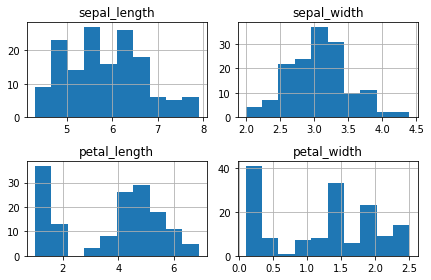

In [19]:
iris.hist()
plt.tight_layout()

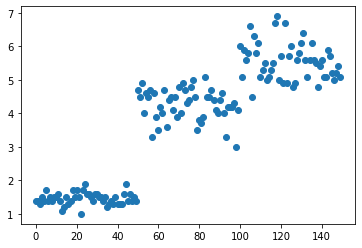

In [20]:
plt.scatter(range(len(iris)),iris['petal_length'])

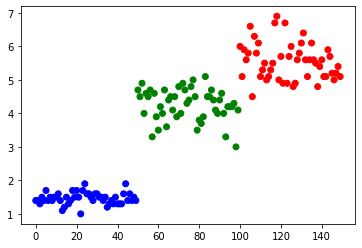

In [21]:
colors = []
for i in range(150):
    if i%3 == 0:
        colors.append('r')
    if i%3 == 1:
        colors.append('g')
    if i%3 == 2:
        colors.append('b')
colors.sort()

plt.scatter(range(len(iris)),iris['petal_length'],color = colors)

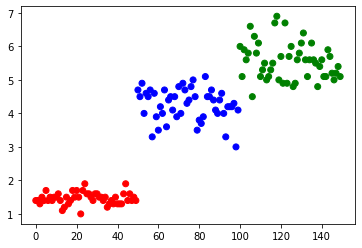

In [22]:
colors = {'setosa':'r','versicolor':'b','virginica':'g'}
plt.scatter(range(len(iris)),iris['petal_length'],color = iris['species'].map(colors))

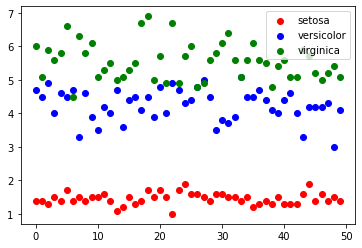

In [23]:
plt.scatter(range(len(setosa)),setosa['petal_length'],color='r',label='setosa')
plt.scatter(range(len(versicolor)),versicolor['petal_length'],color='b',label='versicolor')
plt.scatter(range(len(virginica)),virginica['petal_length'],color='g',label='virginica')
plt.legend()

In [24]:
setosa['petal_length'].min()

1.0

Text(0.5, 1.0, 'distribution of the petal length of different iris species')

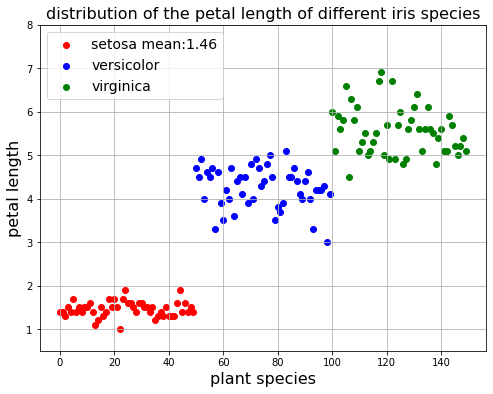

In [47]:
additional_list = [0] * 100
setosa_pl = list(setosa['petal_length'])
setosa_pl = setosa_pl + additional_list

additional_list = [0] * 50
versicolor_pl = list(versicolor['petal_length'])
versicolor_pl = additional_list + versicolor_pl + additional_list

additional_list = [0] * 100
virginica_pl = list(virginica['petal_length'])
virginica_pl = additional_list + virginica_pl

fsize = 16
plt.figure(figsize=(8,6))
plt.scatter(range(len(setosa_pl)),setosa_pl,color='r',label='setosa')#str(round(np.mean(setosa['petal_length']),2))
#plt.axhline(np.mean(setosa['petal_length']), color='r')
plt.scatter(range(len(versicolor_pl)),versicolor_pl,color='b',label='versicolor')
plt.scatter(range(len(virginica_pl)),virginica_pl,color='g',label='virginica')
plt.ylim(0.5,8)
plt.grid()
plt.legend(loc="upper left",fontsize=fsize-2)
plt.xlabel("plant species",fontsize=fsize)
plt.ylabel("petal length",fontsize=fsize)
plt.title("distribution of the petal length of different iris species", fontsize=fsize)

In [48]:
stats.ttest_ind(setosa['petal_length'],versicolor['petal_length']) # --> significant p < a == 0.05 

Ttest_indResult(statistic=-39.492719391538095, pvalue=5.404910513441677e-62)

In [49]:
stats.ttest_ind(setosa['petal_length'],virginica['petal_length']) 

Ttest_indResult(statistic=-49.98618625709594, pvalue=1.5048006992427275e-71)

In [50]:
stats.ttest_ind(versicolor['petal_length'],virginica['petal_length']) 

Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)

In [51]:
stats.shapiro(iris['petal_length'])

ShapiroResult(statistic=0.8762688040733337, pvalue=7.412849778454245e-10)

In [52]:
stats.mannwhitneyu(setosa['petal_length'],virginica['petal_length'])

MannwhitneyuResult(statistic=0.0, pvalue=5.665214485738232e-18)

In [53]:
stats.wilcoxon(setosa['petal_length'],virginica['petal_length'])

WilcoxonResult(statistic=0.0, pvalue=7.463471219275886e-10)

In [54]:
help(stats.wilcoxon)

Help on function wilcoxon in module scipy.stats.morestats:

wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', mode='auto')
    Calculate the Wilcoxon signed-rank test.
    
    The Wilcoxon signed-rank test tests the null hypothesis that two
    related paired samples come from the same distribution. In particular,
    it tests whether the distribution of the differences x - y is symmetric
    about zero. It is a non-parametric version of the paired T-test.
    
    Parameters
    ----------
    x : array_like
        Either the first set of measurements (in which case ``y`` is the second
        set of measurements), or the differences between two sets of
        measurements (in which case ``y`` is not to be specified.)  Must be
        one-dimensional.
    y : array_like, optional
        Either the second set of measurements (if ``x`` is the first set of
        measurements), or not specified (if ``x`` is the differences between
        two sets 

In [ ]:
stats.normaltest(iris['petal_length'])

In [ ]:
help(stats.mannwhitneyu)

In [ ]:
stats.mannwhitneyu(versicolor['petal_length'],virginica['petal_length']) 

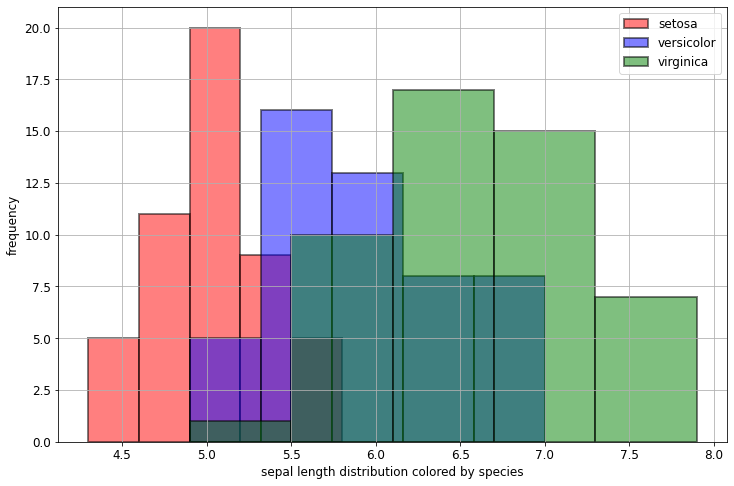

In [55]:
figure = plt.figure(figsize=(12,8))

plt.rcParams['font.size'] = 12
plt.hist(iris[iris['species'] == 'setosa']['sepal_length'], bins=5,color='r', edgecolor='black', linewidth=2, alpha=0.5, label='setosa')
plt.hist(iris[iris['species'] == 'versicolor']['sepal_length'], bins=5,color='b', edgecolor='black', linewidth=2, alpha=0.5, label='versicolor')
plt.hist(iris[iris['species'] == 'virginica']['sepal_length'], bins=5,color='g', edgecolor='black', linewidth=2, alpha=0.5, label='virginica')
plt.xlabel('sepal length distribution colored by species')
plt.ylabel('frequency')
plt.legend()
plt.grid()
plt.show()

In [ ]:
std_population(setosa['petal_width'])

In [ ]:
std_population(virginica['petal_width'])

In [ ]:
std_population(versicolor['petal_width'])

In [ ]:
def std_error_mean(arr):
    sigma = std_population(arr)
    return sigma/np.sqrt(len(arr))

In [ ]:
import scipy.stats as stats

In [ ]:
std_error_mean(iris['petal_width'])

In [ ]:
stats.sem(iris['petal_width'])

In [ ]:
res = stats.shapiro(iris['petal_width'])

In [ ]:
res.pvalue

In [ ]:
iris['petal_width'].hist()

In [ ]:
setosa.hist()
plt.tight_layout()

In [ ]:
stats.pearsonr(setosa['petal_length'],setosa['petal_width'])

In [ ]:
help(stats.shapiro)

In [ ]:
help(stats.normaltest)

In [ ]:
stats.shapiro(setosa['petal_width'])

In [ ]:
stats.normaltest(setosa['petal_width'])

In [ ]:
stats.shapiro(versicolor['petal_width'])

In [ ]:
stats.normaltest(versicolor['petal_width'])

In [ ]:
stats.shapiro(virginica['petal_width'])

In [ ]:
stats.normaltest(virginica['petal_width'])

In [ ]:
#values from a standard normal distribution
x1 = np.random.normal(0,1,1000)
x2 = np.random.normal(0,1,1000)

In [ ]:
plt.figure(figsize=(6,5))
plt.hist(x1,color="tomato",edgecolor='black')
plt.grid()

In [ ]:
#testing for normal distribution
stats.normaltest(x1)

In [ ]:
stats.shapiro(x1)

In [ ]:
np.mean(x1) == np.mean(x2)

In [ ]:
np.mean(x1)

In [ ]:
np.mean(x2)

In [ ]:
stats.ttest_ind(x1,x2) #we have to accept the null hypothesis

In [ ]:
help(stats.ttest_ind)

In [ ]:
def ttest_two_sample(x1,x2):
    x1_mean = np.mean(x1)
    x2_mean = np.mean(x2)
    temp = np.sum((x1 - x1_mean)**2) + np.sum((x2 - x2_mean)**2)
    var = temp/(len(x1)+len(x2)-2)
    t = (x1_mean - x2_mean)/np.sqrt(var*((1/len(x1))+(1/len(x2))))
    return t

In [ ]:
stats.t.cdf(abs(0.8653345405145465),1998)

# CohensD

In [ ]:
def cohensD_equalstd(x1,x2):
    return (np.mean(x1) - np.mean(x2))/np.std(x1)

In [ ]:
def cohensD_uneuqalstd(x1,x2):
    n = np.mean(x1) - np.mean(x2)
    s1 = np.sum((x1 - np.mean(x1))**2)/(len(x1)-1)
    s2 = np.sum((x2 - np.mean(x2))**2)/(len(x2)-1)
    dn = np.sqrt((s1 + s2)/2)
    return n/dn

In [ ]:
cohensD_equalstd(x1,x2)

In [ ]:
def cohens_r(x1,x2):
    d = cohensD_uneuqalstd(x1,x2)
    dn = np.sqrt((d**2) + ((len(x1)+len(x2))**2/(len(x1)*len(x2))))
    return d/dn

In [ ]:
cohens_r(x1,x2)

In [ ]:
t1 = np.random.normal(10,0.5,1000)
t2 = np.random.normal(10,2,1000)

In [ ]:
cohensD_uneuqalstd(t1,t2)